In [1]:
%load_ext autoreload
%autoreload 2

#/Users/marionchaffaut/code/MarionChaff/piano_transcription/src/thepkg/ml_logic/preprocessor.py

from thepkg.ml_logic.preprocessor import spectogram_stft

X_array = spectogram_stft()

FluidSynth runtime version 2.3.4
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'Legnani, Luigi, Rondoletto scherzoso, Op.204, iq55D8Ex4Fo.mid.wav'..
FluidSynth runtime version 2.3.4
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'Kötzschke, Hanns, Piano Sonata, BY8n7VRjhg4.mid.wav'..
FluidSynth runtime version 2.3.4
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'Scriabin, Aleksandr, 2 Impromptus à la Mazur, Op.7, OiiLx4Xqv3Q.mid.wav'..
FluidSynth runtime version 2.3.4
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Cr

In [11]:
import os
import mido
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import librosa

In [2]:
X_array[0]

array([[1.1189828e-02, 2.4719045e-02, 3.0787101e-02, ..., 1.5622445e-02,
        1.9596133e-02, 1.3808126e-02],
       [8.8248821e-03, 1.5632225e-02, 1.5941404e-02, ..., 1.7103024e-02,
        4.5047496e-03, 3.8577478e-02],
       [3.8343843e-03, 3.0009241e-03, 4.1871626e-04, ..., 6.7750462e-03,
        1.3847144e-02, 9.0019211e-02],
       ...,
       [5.5148418e-04, 5.5762345e-04, 1.3111228e-04, ..., 1.6449555e-04,
        1.9914022e-04, 2.4390820e-04],
       [3.3098029e-04, 4.2803140e-04, 1.3153919e-04, ..., 1.8536008e-04,
        1.0555733e-04, 9.2597140e-05],
       [1.2775853e-04, 3.4884582e-04, 1.3164089e-04, ..., 1.1740967e-05,
        3.4225952e-05, 3.8994381e-06]], dtype=float32)

In [35]:

pd.DataFrame(X_array[0])

,0,1,2,3,4,5,6,7,8,9,...,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291
0,0.011190,0.024719,0.030787,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,...,0.001054,0.025733,0.035538,0.028074,0.025113,0.019171,0.013972,0.015622,0.019596,0.013808
1,0.008825,0.015632,0.015941,1.562500e-02,1.562500e-02,1.562500e-02,1.562500e-02,1.562500e-02,1.562500e-02,1.562500e-02,...,0.024099,0.026466,0.044790,0.018218,0.001045,0.010664,0.021211,0.017103,0.004505,0.038577
2,0.003834,0.003001,0.000419,3.402807e-19,3.402807e-19,3.402807e-19,3.402807e-19,3.402807e-19,3.402807e-19,3.402807e-19,...,0.095914,0.127022,0.041688,0.061335,0.044141,0.024802,0.040511,0.006775,0.013847,0.090019
3,0.000372,0.000729,0.000369,3.937597e-20,3.937597e-20,3.937597e-20,3.937597e-20,3.937597e-20,3.937597e-20,3.937597e-20,...,0.570553,0.259750,0.369149,0.144140,0.121858,0.166552,0.014740,0.111616,0.113263,0.055022
4,0.001307,0.001023,0.000309,2.037918e-19,2.037918e-19,2.037918e-19,2.037918e-19,2.037918e-19,2.037918e-19,2.037918e-19,...,2.317749,2.344165,2.115574,1.568426,1.300641,1.030862,0.747847,0.658598,0.457172,0.314698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.000600,0.000584,0.000128,3.667916e-20,3.667916e-20,3.667916e-20,3.667916e-20,3.667916e-20,3.667916e-20,3.667916e-20,...,0.000188,0.000056,0.000236,0.000230,0.000234,0.000160,0.000117,0.000199,0.000307,0.000234
1021,0.000651,0.000622,0.000130,5.306089e-20,5.306089e-20,5.306089e-20,5.306089e-20,5.306089e-20,5.306089e-20,5.306089e-20,...,0.000105,0.000122,0.000226,0.000258,0.000106,0.000286,0.000093,0.000101,0.000215,0.000132
1022,0.000551,0.000558,0.000131,3.722833e-20,3.722833e-20,3.722833e-20,3.722833e-20,3.722833e-20,3.722833e-20,3.722833e-20,...,0.000088,0.000137,0.000166,0.000338,0.000276,0.000291,0.000297,0.000164,0.000199,0.000244
1023,0.000331,0.000428,0.000132,3.557538e-20,3.557538e-20,3.557538e-20,3.557538e-20,3.557538e-20,3.557538e-20,3.557538e-20,...,0.000242,0.000257,0.000229,0.000301,0.000312,0.000115,0.000316,0.000185,0.000106,0.000093


In [36]:
X_array

[array([[1.1189828e-02, 2.4719045e-02, 3.0787101e-02, ..., 1.5622445e-02,
         1.9596133e-02, 1.3808126e-02],
        [8.8248821e-03, 1.5632225e-02, 1.5941404e-02, ..., 1.7103024e-02,
         4.5047496e-03, 3.8577478e-02],
        [3.8343843e-03, 3.0009241e-03, 4.1871626e-04, ..., 6.7750462e-03,
         1.3847144e-02, 9.0019211e-02],
        ...,
        [5.5148418e-04, 5.5762345e-04, 1.3111228e-04, ..., 1.6449555e-04,
         1.9914022e-04, 2.4390820e-04],
        [3.3098029e-04, 4.2803140e-04, 1.3153919e-04, ..., 1.8536008e-04,
         1.0555733e-04, 9.2597140e-05],
        [1.2775853e-04, 3.4884582e-04, 1.3164089e-04, ..., 1.1740967e-05,
         3.4225952e-05, 3.8994381e-06]], dtype=float32),
 array([[1.1189828e-02, 2.4719045e-02, 3.0787101e-02, ..., 3.0613294e-02,
         7.2751530e-03, 3.8979962e-02],
        [8.8248821e-03, 1.5632225e-02, 1.5941404e-02, ..., 1.3955903e-02,
         1.0624865e-02, 4.6639889e-02],
        [3.8343843e-03, 3.0009241e-03, 4.1871626e-04, ...,

In [37]:
pd.DataFrame(X_array[0]).describe()

,0,1,2,3,4,5,6,7,8,9,...,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291
count,1025.000000,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,...,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.000092,8.879571e-05,5.546991e-05,4.573171e-05,4.573171e-05,4.573171e-05,4.573171e-05,4.573171e-05,4.573171e-05,4.573171e-05,...,0.049191,0.042419,0.038511,0.032820,0.026866,0.022903,0.019268,0.017921,0.015824,0.016336
std,0.000474,9.208542e-04,1.082391e-03,1.090871e-03,1.090871e-03,1.090871e-03,1.090871e-03,1.090871e-03,1.090871e-03,1.090871e-03,...,0.196652,0.195433,0.177944,0.158859,0.133187,0.113088,0.098515,0.092551,0.086093,0.076836
min,0.000003,3.701082e-07,6.854339e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000005,0.000008,0.000009,0.000002,0.000013,0.000007,0.000012,0.000004,0.000008,0.000004
25%,0.000027,1.427067e-05,2.527535e-06,3.433653e-20,3.433653e-20,3.433653e-20,3.433653e-20,3.433653e-20,3.433653e-20,3.433653e-20,...,0.000161,0.000158,0.000149,0.000143,0.000142,0.000139,0.000148,0.000157,0.000140,0.000133
50%,0.000036,2.205606e-05,3.908625e-06,5.631355e-20,5.631355e-20,5.631355e-20,5.631355e-20,5.631355e-20,5.631355e-20,5.631355e-20,...,0.000610,0.000374,0.000300,0.000299,0.000309,0.000273,0.000274,0.000272,0.000259,0.000243
75%,0.000054,3.512156e-05,6.748192e-06,9.131504e-20,9.131504e-20,9.131504e-20,9.131504e-20,9.131504e-20,9.131504e-20,9.131504e-20,...,0.014245,0.010196,0.008662,0.006852,0.006193,0.004334,0.003434,0.003084,0.002754,0.003927
max,0.011190,2.471904e-02,3.078710e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,...,2.697598,3.070702,2.831005,2.353873,1.905298,1.585274,1.475746,1.361428,1.274862,1.079686


In [15]:
X_array

[array([[1.1189828e-02, 2.4719045e-02, 3.0787101e-02, ..., 1.5622445e-02,
         1.9596133e-02, 1.3808126e-02],
        [8.8248821e-03, 1.5632225e-02, 1.5941404e-02, ..., 1.7103024e-02,
         4.5047496e-03, 3.8577478e-02],
        [3.8343843e-03, 3.0009241e-03, 4.1871626e-04, ..., 6.7750462e-03,
         1.3847144e-02, 9.0019211e-02],
        ...,
        [5.5148418e-04, 5.5762345e-04, 1.3111228e-04, ..., 1.6449555e-04,
         1.9914022e-04, 2.4390820e-04],
        [3.3098029e-04, 4.2803140e-04, 1.3153919e-04, ..., 1.8536008e-04,
         1.0555733e-04, 9.2597140e-05],
        [1.2775853e-04, 3.4884582e-04, 1.3164089e-04, ..., 1.1740967e-05,
         3.4225952e-05, 3.8994381e-06]], dtype=float32),
 array([[1.1189828e-02, 2.4719045e-02, 3.0787101e-02, ..., 3.0613294e-02,
         7.2751530e-03, 3.8979962e-02],
        [8.8248821e-03, 1.5632225e-02, 1.5941404e-02, ..., 1.3955903e-02,
         1.0624865e-02, 4.6639889e-02],
        [3.8343843e-03, 3.0009241e-03, 4.1871626e-04, ...,

In [38]:

X = np.array(X_array).reshape(100, 1025, 1292)
X.shape

(100, 1025, 1292)

In [21]:
def msg2dict(msg):
    result = {}
    if 'note_on' in msg:
        on_ = True
    elif 'note_off' in msg:
        on_ = False
    else:
        on_ = None
    result['time'] = int(msg[msg.rfind('time'):].split(' ')[0].split('=')[1].translate(
        str.maketrans({a: None for a in string.punctuation})))

    if on_ is not None:
        for k in ['note', 'velocity']:
            result[k] = int(msg[msg.rfind(k):].split(' ')[0].split('=')[1].translate(
                str.maketrans({a: None for a in string.punctuation})))
    return [result, on_]

def switch_note(last_state, note, velocity, on_=True):
    # piano has 88 notes, corresponding to note id 21 to 108, any note out of this range will be ignored
    result = [0] * 88 if last_state is None else last_state.copy()
    if 21 <= note <= 108:
        result[note-21] = velocity if on_ else 0
    return result

def get_new_state(new_msg, last_state):
    new_msg, on_ = msg2dict(str(new_msg))
    new_state = switch_note(last_state, note=new_msg['note'], velocity=new_msg['velocity'], on_=on_) if on_ is not None else last_state
    return [new_state, new_msg['time']]

def track2seq(track):
    # piano has 88 notes, corresponding to note id 21 to 108, any note out of the id range will be ignored
    result = []
    last_state, last_time = get_new_state(str(track[0]), [0]*88)
    for i in range(1, len(track)):
        new_state, new_time = get_new_state(track[i], last_state)
        if new_time > 0:
            result += [last_state]*new_time
        last_state, last_time = new_state, new_time
    return result

def mid2arry(mid, min_msg_pct=0.1):
    tracks_len = [len(tr) for tr in mid.tracks]
    min_n_msg = max(tracks_len) * min_msg_pct
    # convert each track to nested list
    all_arys = []
    for i in range(len(mid.tracks)):
        if len(mid.tracks[i]) > min_n_msg:
            ary_i = track2seq(mid.tracks[i])
            all_arys.append(ary_i)
    # make all nested list the same length
    max_len = max([len(ary) for ary in all_arys])
    for i in range(len(all_arys)):
        if len(all_arys[i]) < max_len:
            all_arys[i] += [[0] * 88] * (max_len - len(all_arys[i]))
    all_arys = np.array(all_arys)
    all_arys = all_arys.max(axis=0)
    # trim: remove consecutive 0s in the beginning and at the end
    sums = all_arys.sum(axis=1)
    ends = np.where(sums > 0)[0]
    return all_arys[min(ends): max(ends)]


In [19]:


def convert_midi_to_array(path="./data/midis"):

    files = list(os.scandir(path))
    y_array = []
    for file in files[0:5]:
        file_midi = mido.MidiFile(file)
        output = mid2arry(file_midi)
        y_array.append(output)
    return y_array


In [22]:
y = convert_midi_to_array()

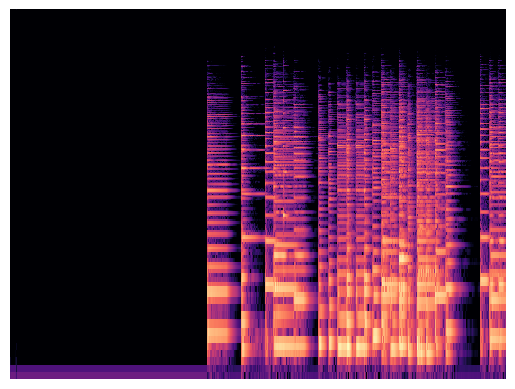

In [30]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(X_array[1],ref=np.max),y_axis='log', x_axis='time', ax=ax)
plt.axis('off')
plt.savefig('spectrogram.png')

In [14]:
img_list = []
img_list.append(img)
img_list

In [47]:
y[0].shape

(260385, 88)

In [159]:
len(y)

5

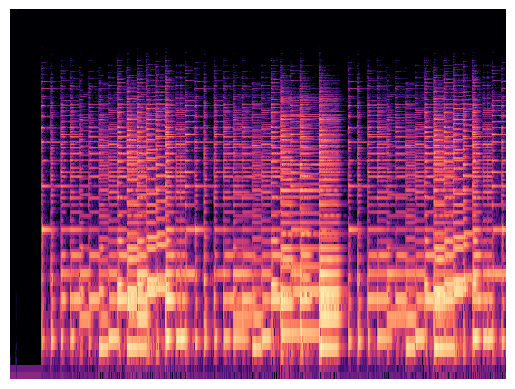

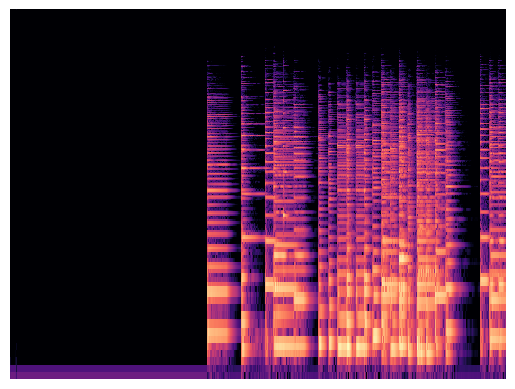

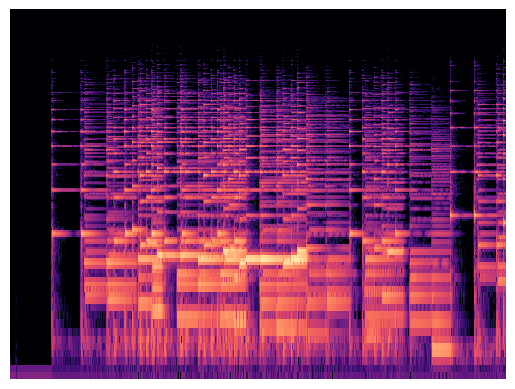

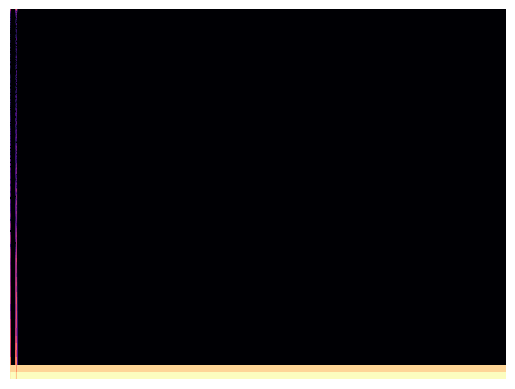

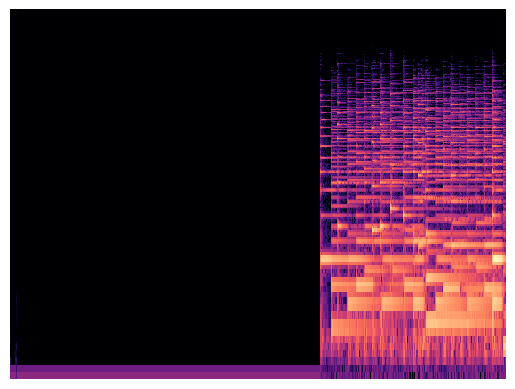

In [33]:
X_img = []
name_list = []
index = 0

for item in X_array : 
    index = index + 1
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(item,ref=np.max),y_axis='log', x_axis='time', ax=ax)
    plt.axis('off')
    plt.savefig(f'img{index}.png')
    name_list.append(f'img{index}.png')

In [34]:
name_list

['img1.png', 'img2.png', 'img3.png', 'img4.png', 'img5.png']

In [152]:
X_image_draft = []
from PIL import Image
for name in name_list : 
    object = Image.open(name).crop((80,58,576,427)).resize((49, 145), Image.NEAREST)
    object_array1 = np.asarray(object)/255
    object_array2 = object_array1[0][:, :-1]
    X_image_draft.append(object_array2)
X_image=np.asarray(X_image_draft)

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_image, y, test_size=0.2, random_state=42)

In [160]:
len(X_train)

4

In [161]:
len(y_train)

4

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Dropout


model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1),activation='tanh',input_shape=(145, 49, 4)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, (3,3), activation='tanh'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(88, activation='sigmoid'))


In [157]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [158]:
model.fit(X_train,y_train,epochs=1,batch_size=32,verbose=1)

ValueError: Data cardinality is ambiguous:
  x sizes: 4
  y sizes: 140969, 357339, 260385, 205925
Make sure all arrays contain the same number of samples.